# Naive Bayes
## This notebook outlines the usage and some examples of Naive Bayes Classification Machine learning algorithm

- Naive Bayes models are a group of extremely **fast** and **simple** classification algorithms that are often suitable for very high-dimensional datasets
- **Quick-and-dirty baseline** for a classification problem

## Bayes Theorem

An equation describing the relationship of conditional probabilities of statistical quantities.

Finding the probability of a label given some observed features  $P(L~|~{\rm features})$

Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a **generative model** because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

### Why the name naive?
If we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

# Example 1
# Tennis_dataset :
https://raw.githubusercontent.com/subashgandyer/datasets/main/PlayTennis.csv

In [3]:
import pandas as pd
import numpy as np

In [5]:
url = "https://raw.githubusercontent.com/subashgandyer/datasets/main/PlayTennis.csv"

In [7]:
play_tennis = pd.read_csv(url)
play_tennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### How many features?

In [10]:
len(play_tennis.columns) - 1

4

In [12]:
play_tennis.shape[1]

5

### How many categorical features?

In [15]:
play_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


### How many numerical features?

In [18]:
play_tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


### How many samples?

In [21]:
play_tennis.shape[0]

14

# Bayes Theorem Exercise: Manual

### Question: If Temperature is Mild, Can Tennis be played?
$$
P(Play Tennis ~|~ {\rm Temperature = Mild})
$$

Hint: Use Bayes' Rule

- 
$$
P(Play Tennis ~|~ {\rm Temperature = Mild}) = \frac{P({\rm Temperature = Mild}~|~ Play Tennis)P(Play Tennis)}{P({\rm Temperature = Mild})}
$$

### Collect only Temperature and Play Tennis features

In [27]:
df = play_tennis[['Temperature', 'Play Tennis']]
df

,Temperature,Play Tennis
0,Hot,No
1,Hot,No
2,Hot,Yes
3,Mild,Yes
4,Cool,Yes
5,Cool,No
6,Cool,Yes
7,Mild,No
8,Cool,Yes
9,Mild,Yes


### Create a Probability Table (manual)

$$
P(Play Tennis ~|~ {\rm Temperature = Mild}) = \frac{P({\rm Temperature = Mild}~|~ Play Tennis)P(Play Tennis)}{P({\rm Temperature = Mild})}
$$

![(Play Tennis Template)](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/PlayTennis_template.png)

### Compute $P({\rm Temperature = Mild})$

### Compute $P({\rm Play Tennis})$

### Compute $P( Temperature = Mild~|~ Play Tennis)$

### Compute $P(Play Tennis ~|~ {\rm Temperature = Mild})$

### Convert the Categorical features into Numerical Features
- Use LabelEncoder( )
- Use OneHotEncoder( )

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
number = LabelEncoder()
play_tennis['Outlook'] = number.fit_transform(play_tennis['Outlook'])
play_tennis['Temperature'] = number.fit_transform(play_tennis['Temperature'])
play_tennis['Humidity'] = number.fit_transform(play_tennis['Humidity'])
play_tennis['Wind'] = number.fit_transform(play_tennis['Wind'])
play_tennis['Play Tennis'] = number.fit_transform(play_tennis['Play Tennis'])

### Split the dataset into X and y

In [39]:
features = ["Outlook", "Temperature", "Humidity", "Wind"]
target = "Play Tennis"

### Split into train and test

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(play_tennis[features], 
                                                                            play_tennis[target],
                                                                            test_size = 0.33,
                                                                            random_state = 54
)


In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9, 4), (5, 4), (9,), (5,))

### Import the GaussianNB Estimator

In [50]:
from sklearn.naive_bayes import GaussianNB

### Create the GaussianNB model

In [54]:
model = GaussianNB()

### Fit the model

In [57]:
model.fit(x_train, y_train)

GaussianNB()

### Predict the testing data

In [60]:
y_pred = model.predict(x_test)

### Accuracy

In [63]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

### Let's apply to a real world sample

- Outlook = Rain
- Temperature = Mild
- Humidity = High
- Wind = Weak

### Build the testing sample vector

In [70]:
sample = np.array([1, 2, 0, 1])

### Predict on the sample

In [73]:
model.predict(sample.reshape(1,-1))

C:\Users\wayne\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

### Try some other sample with different values

- Outlook = Rain
- Temperature = Cold
- Humidity = High
- Wind = Weak

# Example 2
# Text Classification

This task is to classify the text with respect to newsgroup classes.

Given a piece of text, find which class (topic) it belongs to.

### Newsgroup Built-in dataset

In [12]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Fetch the training set and testing test

In [15]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

### Explore the training data

In [18]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

### How to convert this piece of text into numerical vectors?
Solution: NLP Feature Extraction

### Let's do a simple TF-IDF Vectorizer
Do not worry too much about it as we will see it in a subsequent lecture in detail on Feature Extraction techniques.

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.


### Import TfidfVectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Import Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB

### Import pipeline

In [30]:
from sklearn.pipeline import make_pipeline

### Create a pipeline with Tfidf and MultinomialNB

In [33]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [35]:
train.target

array([7, 4, 4, ..., 3, 1, 8])

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer


# 初始化 TF-IDF 向量器
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b[a-zA-Z]+\b",stop_words='english',min_df=5, max_df=0.9)

# 轉換文本為 TF-IDF 特徵矩陣
tfidf_matrix = vectorizer.fit_transform(train.data, train.target)

# 取得 TF-IDF 特徵詞
feature_names = vectorizer.get_feature_names_out()

print(feature_names)
# 轉換為可讀數據格式
import pandas as pd
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# 方式 1：如果在 Jupyter Notebook，建議使用 display()
from IPython.display import display
display(df)

df_target = pd.DataFrame({'Category Index': train.target})
display(df_target)


['aa' 'aaa' 'aamir' ... 'zy' 'zyeh' 'zz']


,aa,aaa,aamir,aardvark,aargh,aario,aaron,aau,ab,abad,...,zuma,zumabot,zur,zurich,zv,zw,zx,zy,zyeh,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Category Index
0,7
1,4
2,4
3,1
4,14
...,...
11309,13
11310,4
11311,3
11312,1


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 初始化 TF-IDF 向量器
vectorizer = TfidfVectorizer()

# 轉換文本數據為 TF-IDF 矩陣
tfidf_matrix = vectorizer.fit_transform(train.data)

# 獲取詞彙名稱（即 TF-IDF 特徵）
feature_names = vectorizer.get_feature_names_out()

# 轉換 TF-IDF 矩陣為 DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# 加入類別標籤
df_tfidf['Category Index'] = train.target
df_tfidf['Category Name'] = [train.target_names[i] for i in train.target]

# 顯示 DataFrame
from IPython.display import display

# 顯示 DataFrame
print(df_tfidf.head(10))  # 只顯示前 5 行，避免輸出過長


    00  000  0000  00000  000000  00000000  0000000004  0000000005  00000000b  \
0  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
1  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
2  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
3  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
4  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
5  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
6  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
7  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
8  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   
9  0.0  0.0   0.0    0.0     0.0       0.0         0.0         0.0        0.0   

   00000001  ...   ée  égligent  élangea  érale  ête  íålittin  ñaustin   ýé  \
0       0.0  ...  0.0       

In [40]:
#結果解釋
#每一行代表一篇文檔（來自 train.data）。
#每一列（除了最後兩列）代表一個詞（從 TfidfVectorizer() 提取的詞彙）。
#數值表示 TF-IDF 權重（表示該詞在該文檔中的重要性）。
#最後兩列：
#Category Index：該文檔對應的 train.target（類別索引）。
#Category Name：該文檔對應的 train.target_names（類別名稱）。

In [164]:
unique_category_indices = np.unique(train.target)
print(unique_category_indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [166]:
# 列出所有 Category Name
category_names = train.target_names
print(category_names)


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [176]:
import pandas as pd

# 建立對照表
df_category_map = pd.DataFrame({'Category Index': unique_category_indices, 'Category Name': category_names})

# 顯示對照表
df_category_map


,Category Index,Category Name
0,0,alt.atheism
1,1,comp.graphics
2,2,comp.os.ms-windows.misc
3,3,comp.sys.ibm.pc.hardware
4,4,comp.sys.mac.hardware
5,5,comp.windows.x
6,6,misc.forsale
7,7,rec.autos
8,8,rec.motorcycles
9,9,rec.sport.baseball


### Fit the model

In [95]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

### Predict on testing data

In [98]:
labels = model.predict(test.data)

### Confusion matrix between the true and predicted labels for the test data

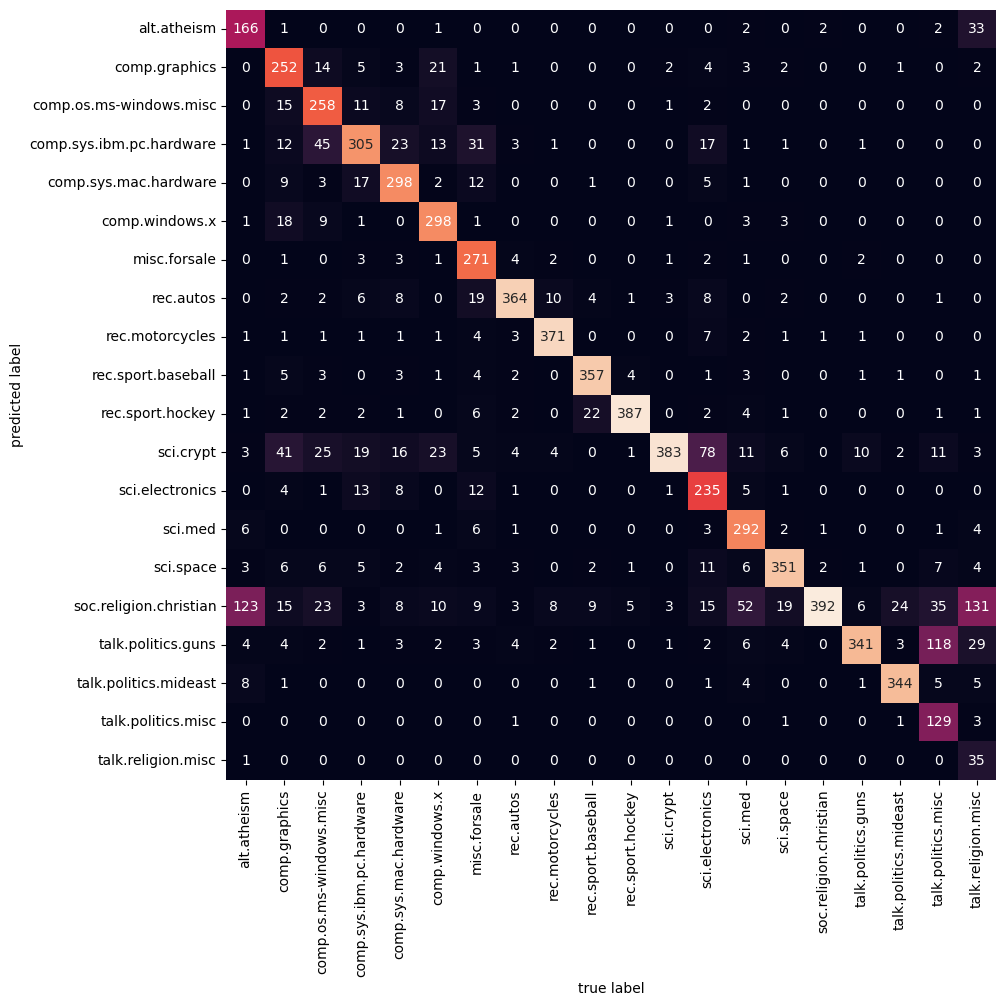

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Insights ???

### Predict function

In [141]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

### Test some samples

In [144]:
predict_category('sending a payload to the ISS')

'sci.space'

In [108]:
predict_category('discussing islam vs atheism')

'alt.atheism'

In [110]:
predict_category('determining the screen resolution')

'comp.graphics'

In [114]:
predict_category('math')

'comp.sys.mac.hardware'